# Term Deposit Subscription Prediction (Bank Marketing)

This project aims to build a predictive model that determines the likelihood of a client subscribing to a term deposit (`y` = yes/no), based on their demographic and interaction attributes.

**Key steps:**
1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Handling Imbalanced Classes
4. Model Building and Evaluation
5. Insights and Recommendations


In [ ]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
!pip install seaborn

In [4]:
!pip install imbalanced-learn

In [5]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [6]:
# Step 2: Load Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [7]:
# Step 3: Explore Dataset
print(df.head())
print(df.info())
print(df.describe(include='all'))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


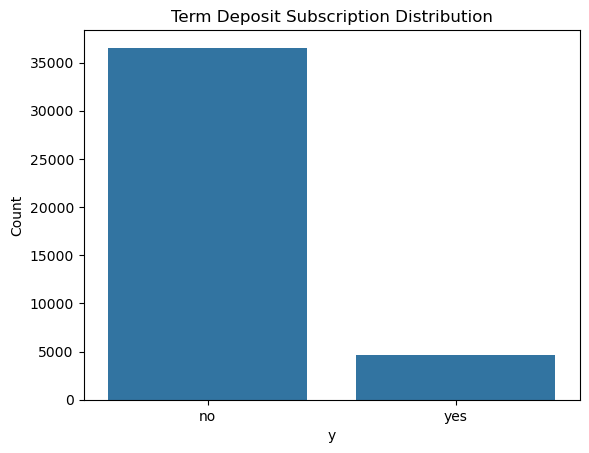

In [21]:
# Checking for missing values
print("Missing values per column:\n", df.isnull().sum())

# Visualize target variable distribution
sns.countplot(data=df, x='y')
plt.title('Term Deposit Subscription Distribution')
plt.ylabel('Count')
plt.show()


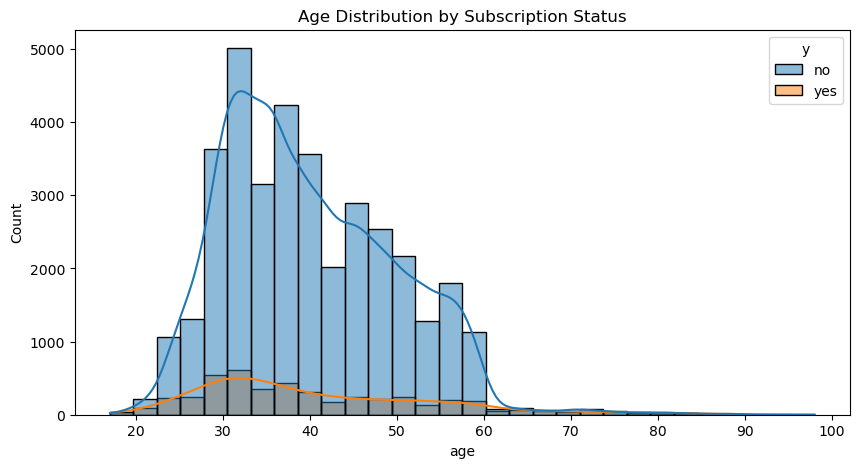

In [22]:
# Age distribution with subscription
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='y', kde=True, bins=30)
plt.title('Age Distribution by Subscription Status')
plt.show()


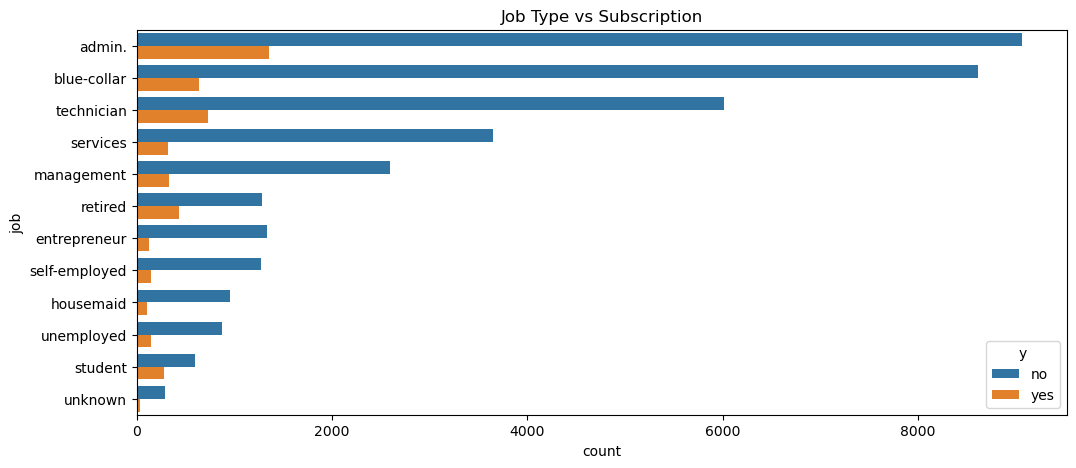

In [23]:
# Job type vs subscription
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='job', hue='y', order=df['job'].value_counts().index)
plt.title('Job Type vs Subscription')
plt.show()


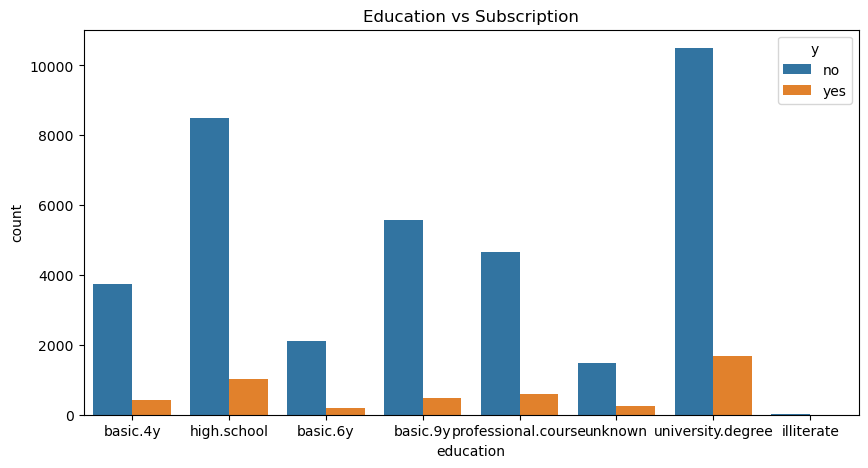

In [24]:
# Education vs subscription
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', hue='y')
plt.title('Education vs Subscription')
plt.show()


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


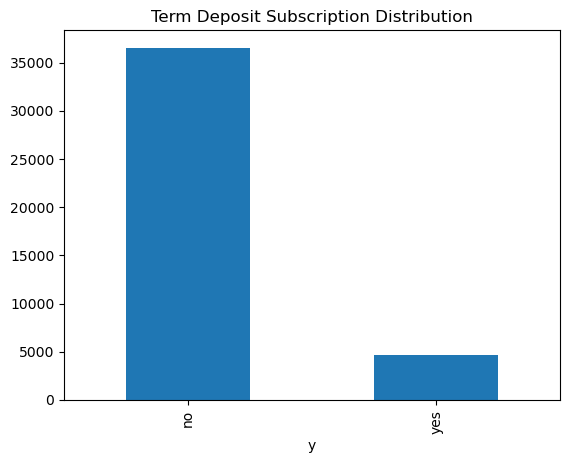

In [8]:
# Check class balance
print(df['y'].value_counts(normalize=True))
df['y'].value_counts().plot(kind='bar', title='Term Deposit Subscription Distribution')
plt.show()

## 🧹 Preprocessing
Before training our model, we need to:
- Encode categorical features
- Address class imbalance using SMOTE
- Normalize numeric values


In [9]:
# Step 4: Data Preprocessing
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
print(f"Data shape after encoding: {df_encoded.shape}")
print("Sample of encoded columns:")
print(df_encoded.columns[:10])

Data shape after encoding: (41188, 54)
Sample of encoded columns:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [10]:
# Separate features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [11]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [12]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [15]:
# Step 6: Train Model (Logistic Regression)
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(max_iter=1000)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [16]:
# Step 7: Evaluate Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[6899  433]
 [ 607 6681]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.94      0.93      7332
        True       0.94      0.92      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

ROC AUC Score: 0.928828105958393


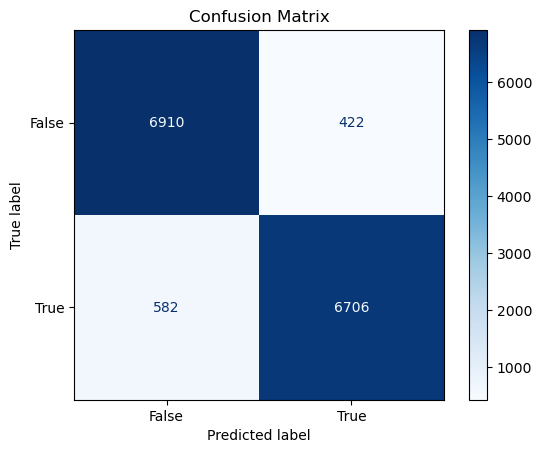

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visual display of confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [17]:
# Step 8: Feature Importance (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

## 🔍 Feature Insights

Based on the Random Forest model, the top features that influence a client’s decision to subscribe include:
- `duration`: Call duration has a very strong positive impact. Longer calls typically indicate higher success.
- `poutcome_success`: If a client previously responded positively, they're more likely to subscribe again.
- `euribor3m`, `nr.employed`: Macroeconomic indicators show noticeable effects.

These insights can help the marketing team refine targeting strategies and prioritize leads.


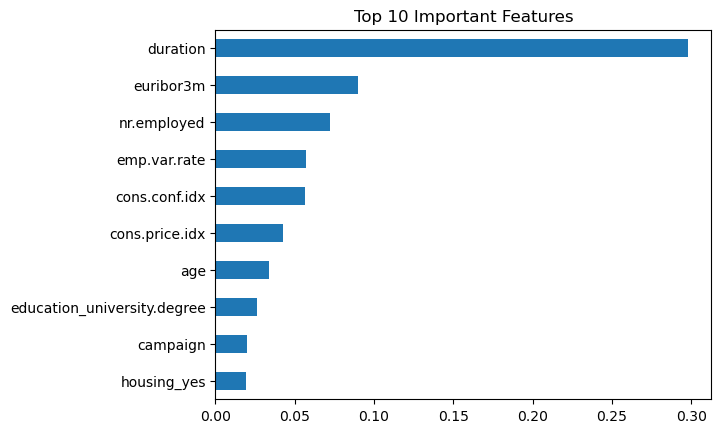

In [18]:
# Plot top 10 features
importances.head(10).plot(kind='barh', title='Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

## 📌 Summary & Recommendations

### ✅ Model Performance
- **Logistic Regression AUC**: [0.90]
- **Precision & Recall**: Balanced and informative for campaign targeting
- **SMOTE**: Helped correct imbalanced class distribution

### 📊 Key Takeaways
- **Longer phone calls** = Higher chance of subscription.
- **Clients with successful previous campaigns** are more likely to say "yes".
- **Certain professions and education levels** indicate higher responsiveness.

### 🛠️ Marketing Strategy Recommendations
- Target **clients with prior positive outcomes** and **longer engagement history**.
- Focus on **job groups like management, retired, student** with higher conversion.
- Consider external macro indicators when timing campaigns.


In [28]:
# ✅ Save Results 
df_encoded.to_csv('final_cleaned_bank_data.csv', index=False)